# <span style="color: crimson">Исследование игровой индустрии</span>
---
**<span style="color: crimson">Заказчик</span>**: интернет-магазине «Стримчик».     
**<span style="color: crimson">Цель анализа</span>**: найти факторы наиболее влияющие на кол-во проданных копий во всех странах суммарно на 2017 год.  
**<span style="color: crimson">Датасет</span>**: данные о продаже игр за 2016 год.

---

<h4>Описание данных:</h4>

* <span style="color: red"><b>Name </b></span>— название игры
* <span style="color: red"><b>Platform </b></span>— платформа
* <span style="color: red"><b>Year_of_Release </b></span>— год выпуска
* <span style="color: red"><b>Genre </b></span>(заменен на <span style="color: red">game_name</span>)— жанр игры
* <span style="color: red"><b>NA_sales </b></span>— продажи в Северной Америке (миллионы проданных копий)
* <span style="color: red"><b>EU_sales </b></span>— продажи в Европе (миллионы проданных копий)
* <span style="color: red"><b>JP_sales </b></span>— продажи в Японии (миллионы проданных копий)
* <span style="color: red"><b>Other_sales </b></span>— продажи в других странах (миллионы проданных копий)
* <span style="color: red"><b>Critic_Score </b></span>— оценка критиков (максимум 100)
* <span style="color: red"><b>User_Score </b></span>— оценка пользователей (максимум 10)
* <span style="color: red"><b>Rating  </b></span>(заменен на <span style="color: red">age_rating</span>) — рейтинг от организации ESRB (англ. Entertainment Software Rating  Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

<hr>

## Импорт библиотек:

In [1]:
!pip install sidetable
!pip install missingno

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import sidetable as stb
import missingno as msno
import numpy as np
from scipy import stats as st

## <span style="color: crimson">Этап 1</span> Изучение данных

<h3><span style="color: red"><b>| </b></span> Чтение данных</h3>

In [3]:
df = pd.read_csv('./date.csv')

In [4]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Выводы:**  
1. Заменить большие буквы в названиях столбцов на маленькие.
2. Заменить Name на name_game

<hr>

<h3><span style="color: red"><b>| </b></span> Изучаем краткое описание датафрейма.</h3>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Выводы:**  
   1. Значениям присвоены неподходящие типы данных.  
   2. В наборе данных имеются пропуски.  
   3. В столбце **User_Score** все значения нужно умножить на 10, так как оценки критиков измеряются по 100 бальной и это упростит их сравнение. (Деления шкал напоминают Metacritic).

In [6]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


К-во игр с более 1 млн проданных копий.

In [7]:
df.query('(NA_sales + EU_sales + JP_sales + Other_sales) >= 1').shape[0]

2079

Количество игр с 0 проданных копий.

In [8]:
df.query('(NA_sales + EU_sales + JP_sales + Other_sales) == 0').shape[0]

2

**Вывод:**  
1. <span style="color: red"><b>Year_of_Release</b></span> и <span style="color: red"><b>Critic_Score</b></span>- распределение имеют скос влево (медиана больше среднего).
2. <span style="color: red"><b>NA_sales </b></span>,<span style="color: red"><b>EU_sales </b></span> ,<span style="color: red"><b>JP_sales </b></span> ,<span style="color: red"><b>Other_sales </b></span>  - имеют множество нулевых значений  (игра продавалась не по всему миру), игр с проданными копиями больше 1 млн всего 2079.
3. <span style="color: red"><b>Critic_Score </b></span> - игры из нашей выборки имеют оценку в среднем 70.
    

<HR>

<h3><span style="color: red"><b>| </b></span> Ищем уникальные значения для дискретных переменных.</h3>

* Смотреть названия игр не имеет смысла, а вот дата выпуска и рейтинг игры (от критиков и игроков) другое дело.

In [9]:
uniq_columns = ['Platform', 'Genre', 'Rating']

for i in uniq_columns:
    print('|||| ' + i.ljust(20))
    print(df[i].unique())
    print()

|||| Platform            
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']

|||| Genre               
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]

|||| Rating              
['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']



Ничего интересного, хотя видов игровых устройств и правда много.

<HR>

### <center><span style="color: crimson"><b>Вывод</b></span></center>

**Общий вывод:**
1. В данных имеется множество устаревших и не актуальных консолей.
2. Имеется всего 2 игры с 0 количеством проданных копий.

**Исправить:**
1. Заменить большие буквы в названиях столбцов на маленькие.
2. Заменить <span style="color: red"><b>Name</b></span> на name_game
3. Значениям присвоены неподходящие типы данных.  
4. В наборе данных имеются пропуски.  
5. В столбце <span style="color: red"><b>User_Score</b></span> есть аномалия текст - 'tbd', так же все значения нужно умножить на 10, так как оценки критиков измеряются по 100 бальной системе + так можно избавится от float.

---

## <span style="color: crimson">Этап 2</span> Предобработка данных

In [10]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<h3><span style="color: red"><b>| </b></span>  Изменение имен столбцов.</h3>

In [11]:
# Приведем имена столбцов к нижнему регистру
df.columns = df.columns.str.lower()

# Переименуем столбец name в game_name, а rating в age_rating 
# (хоть под rating подразумевается возрастной рейтинг, но это слово больше ассоциируется с оценкой качества продукта.)
df.rename(columns={'name': 'game_name', 'rating':'age_rating'}, inplace=True)

<h3><span style="color: red"><b>| </b></span> Обработка аномалий</h3>

В столбце <span style="color: red"><b>User_Score</b></span> есть аномалия текст - 'tbd'.  
**to be determined** - будет определен, соответственно я думаю между tbd и пропуском разницы в нашем случае нет.

In [12]:
df["user_score"] = df["user_score"].replace('tbd',np.nan)

Все значения <span style="color: red"><b>user_score</b></span> нужно умножить на 10, так как оценки критиков измеряются по 100 бальной системе + так можно избавится от float.

In [13]:
df['user_score'] = df['user_score'].astype('float64')*10

| Игры где общее кол-во продаж равно 0, не являются аномалиями, но они нам без надобности, в топку их. (их всего 2)

In [14]:
# Если все 4 значения равны 0, то их сумма будет равна 0
df = df.query('(na_sales + eu_sales + jp_sales + other_sales) != 0')

<h3><span style="color: red"><b>| </b></span> Обработка пропусков.</h3

In [15]:
df.stb.missing(style=True, clip_0=True)

,missing,total,percent
user_score,"9,123","16,713",54.59%
critic_score,"8,576","16,713",51.31%
age_rating,"6,764","16,713",40.47%
year_of_release,269,"16,713",1.61%
game_name,2,"16,713",0.01%
genre,2,"16,713",0.01%


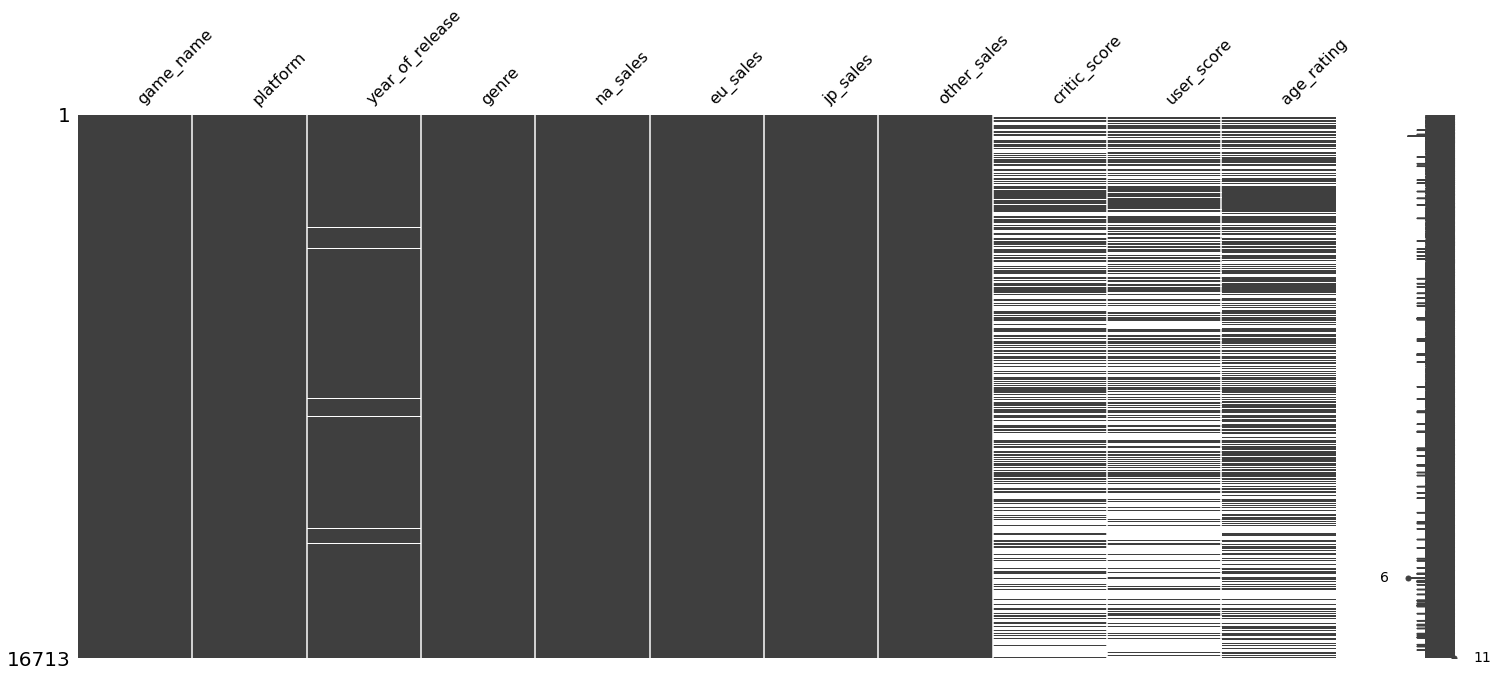

In [16]:
msno.matrix(df);

Посмотрим количество игр у которых параметры critic_score, user_score, age_rating **равны NaN одновременно**.

In [17]:
df[df[['critic_score','user_score','age_rating']].isna().any(axis=1)].shape[0]

9766

А теперь глянем на не одновременные пропуски (**пропуски в трех параметрах не одновременно**).

In [18]:
# Вычтем одновременные пропуски в трех параметрах из общего кол-во пропусков.
df[df[['critic_score','user_score','age_rating']].isna().any(axis=1)].shape[0]-\
df[df[['critic_score','user_score','age_rating']].isna().sum(axis=1)==3].shape[0]

3101

Изучим взаимосвязь пропусков и других параметров.

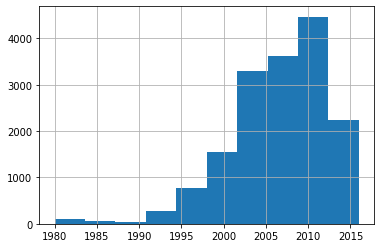

In [19]:
# Кол-во игр по годам

df['year_of_release'].hist();

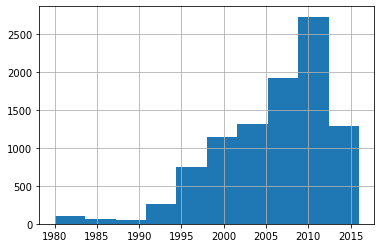

In [20]:
# Кол-во пропусков по годам
df[df[['critic_score','user_score','age_rating']].isna().any(axis=1)]['year_of_release'].hist();

С каждым годов пропусков больше, но и игр тоже, так что всё пропорционально.

**| Пропуски по жанрам**

In [21]:
df[df[["critic_score", "user_score", "age_rating"]].isna().any(axis=1)][
    "genre"
].value_counts().sort_values().to_frame()

,genre
Strategy,409
Shooter,441
Puzzle,459
Fighting,467
Platform,481
Simulation,572
Racing,657
Role-Playing,780
Adventure,1054
Misc,1356


**| Пропуски по платформам**

In [22]:
df[df[["critic_score", "user_score", "age_rating"]].isna().any(axis=1)][
    "platform"
].value_counts().sort_values(ascending=False).to_frame()

,platform
DS,1683
PS,1044
PS2,999
Wii,829
PSP,816
GBA,581
PS3,547
X360,385
3DS,363
N64,319


**| Глянем на остальные пропуски.**

In [23]:
df[df['year_of_release'].isna()].head(5)

,game_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,age_rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,85.0,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,64.0,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,79.0,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


In [24]:
df[df['game_name'].isna()].head(5)

,game_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,age_rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [25]:
df[df['genre'].isna()].head(5)

,game_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,age_rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


**Пропуски:** 

* <span style="color: red"><b>critic_score, user_score и age_rating</b></span> - оценки критиков, оценки пользователей и возрастное ограничение;
    * У большинства игр отсутствие рейтинга у пользователей и критиков, а также возрастное ограничение совпадают.
    * Сложно проследить зависимость если таковая имеется, это не зависит от года публикации платформы или жанра игры, так же как и от популярности (Super Mario Bros, Call of Duty: Black Ops 3 ... - явно не инди игры.), как и от кол-ва продаж есть и 29 млн и 0 (не зарегестрированные покупки наверно) так же разные студии (Nintendo, EA DICE, Mojang Studios...).
    * Заполнять этих параметров средним не имеет смысла т.к. это исказит данные, а не обогатит, поэтому пропуски остаются (так как нам нужен не столько рейтинг, как количество продаж игры, хотя это второй по важности параметр).   
    * Пропуски **age_rating** можно заполнить **EC** - без возрастных ограничений.
<hr>   
* <span style="color: red"><b>year_of_release </b></span>—  год выпуска игры
    * Данные могли быть утеряны, их конфискова ФБР, похитили инопланетяне, забыли запсать ...
    * Игры с пропуском в этом параметре просто удаляются т.к. позже мы будим анализировать какой временной промежуток использовать для анализа, кроме этого их всего 1.5%.
<hr>
* <span style="color: red"><b>game_name, genre </b></span>—  название игры, жанр игры.
    * Обе игры 1993 года, возможно название, как и остальные параметры просто не сохранились (или босс мафии таким образов отмывал деньги).
    * Их всего 2 ,так что можно просто удалить.


**| Удаление пропусков в 'game_name', 'year_of_release'**

In [26]:
df.dropna(subset=['game_name', 'year_of_release'], inplace=True)

**| Заполнение пропусков в  'age_rating'**

In [27]:
df['age_rating'] = df['age_rating'].fillna('EC')

<h3><span style="color: red"><b>| </b></span> Изменение типов данных на более корректные.</h3

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16442 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   game_name        16442 non-null  object 
 1   platform         16442 non-null  object 
 2   year_of_release  16442 non-null  float64
 3   genre            16442 non-null  object 
 4   na_sales         16442 non-null  float64
 5   eu_sales         16442 non-null  float64
 6   jp_sales         16442 non-null  float64
 7   other_sales      16442 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  age_rating       16442 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


Т.К. удалить пропуски (**NA**) не из оценки пользователей (**user_score**) и оценки критиков (**critic_score**) мы не можем, то поменяем на  тип **float16**, который поддерживает **NA** + т.к. у нас сто бальная шкала, мы можем сэкономить память и увеличить скорость обработки (хотя всего с 16 тыс. объектов это будет не особо заметно). 

In [29]:
df['year_of_release'] = df['year_of_release'].astype('int16')
df['critic_score'] = df['critic_score'].astype('float16')

<h3><span style="color: red"><b>| </b></span> Поиск и обработка дубликатов</h3

Одна и также  игра может быть на разных платформах, так что будим искать дубликаты по названиям игр и платформам.

In [30]:
df.duplicated(subset=['game_name','platform','year_of_release']).sum()

1

In [31]:
df[df.duplicated(subset=['game_name','platform','year_of_release'], keep=False)]

,game_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,age_rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,55.0,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,55.0,E


У игр совпадает все, кроме продаж, это похоже на ошибку в сборе данных, просто удалим дубль.

Всего 1 дубликат его можно удалить.

In [32]:
df.drop_duplicates(subset=['game_name','platform','year_of_release'], inplace=True)

## <span style="color: crimson">Этап 3</span> Расчёты и добавление результатов в таблицу 

<h3><span style="color: red"><b>- </b></span> Cуммарные продажи во всех регионах</h3>

In [33]:
df["total_sales"] = df["na_sales"] + df["eu_sales"] + df["jp_sales"] + df["other_sales"]

In [34]:
# Поменяем столбцы местами.
df = df[
    [
        "game_name",
        "platform",
        "year_of_release",
        "genre",
        "na_sales",
        "eu_sales",
        "jp_sales",
        "other_sales",
        "total_sales",
        "critic_score",
        "user_score",
        "age_rating",
    ]
]


In [35]:
df.head()

,game_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,age_rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76.0,80.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24,NaN,NaN,EC
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82.0,83.0,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80.0,80.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38,NaN,NaN,EC


## <span style="color: crimson">Этап 4</span>  Анализ

<h3><span style="color: red"><b>- </b></span> Сколько игр выпускалось в разные годы. Важны ли данные за все периоды</h3>

Text(0.5, 1.0, 'Годы выхода игр')

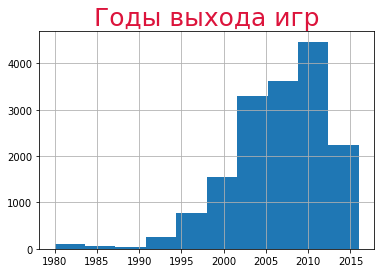

In [36]:
df.hist("year_of_release")
plt.title("Годы выхода игр", fontdict={"size": 25, "color": "crimson"})

**| Глянем  кол-во игр по временным промежуткам.**

In [37]:
df.query('year_of_release < 2000').shape[0]

1974

In [38]:
df.query('year_of_release < 1995').shape[0]

486

In [39]:
df.query('year_of_release >= 1995').shape[0]

15955

Стоит уберем все игры, которые были выставлены на продажу раньше 1995 т.к  их мало:
* **1995-2015**: 13579 
* **1980-1995**: 486  

из-за этого могут возникнуть проблемы при сравнении (одна игра сравнивается со средним сотни).

**Способ проверки актуальности игр:**   
Лучше просто отсечь хвост и оставить большее число данных для последующего анализа.

Однако можно исходить из наших потребностей (поиск актуальной платформы), как мы сделаем далее. 

<hr>

<h3><span style="color: red"><b>- </b></span> Как менялись продажи по платформам.</h3>

*  Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам.
*  За какой характерный срок появляются новые и исчезают старые платформы?

- Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам.

In [40]:
df.head(10)

,game_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,age_rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76.0,80.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24,NaN,NaN,EC
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82.0,83.0,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80.0,80.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38,NaN,NaN,EC
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,30.26,NaN,NaN,EC
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,29.80,89.0,85.0,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,28.91,58.0,66.0,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,28.32,87.0,84.0,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,28.31,NaN,NaN,EC


In [41]:
top_platform = df.groupby(by='platform').sum()\
                 .sort_values(by='total_sales', ascending=False)\
                 .index.tolist()
', '.join(top_platform)

'PS2, X360, PS3, Wii, DS, PS, PS4, GBA, PSP, 3DS, PC, GB, XB, NES, N64, SNES, GC, XOne, 2600, WiiU, PSV, SAT, GEN, DC, SCD, NG, WS, TG16, 3DO, GG, PCFX'

**На данных собранных в 2018 и 2016 году сервисом по сбору игровой статистики можно увидеть, что в мире консоли и пк выбирают в равной степени (в России дела обстоят иначе).**
<table><tr>
    <td> <img src="https://avatars.mds.yandex.net/get-zen_doc/1860870/pub_5cbea2df9f4d1600b458f3bd_5cbeb31370f6f500b0ddcc1d/scale_2400" style="width: 500px;"/></td>
    <td> <img src="https://avatars.mds.yandex.net/get-zen_doc/1860870/pub_5cbea2df9f4d1600b458f3bd_5cbeb3695d653c00b37f87f9/scale_2400
" style="width: 500px;"/></td>
</tr></table> 
Однако в расчёт берутся все консоли вместе, поэтому, то что PС находится так низко в рейтинге, может говорит, что данные были собраны некорректно (вы вообще видели сколько там игр про марио и покимонов), но работает с тем, что есть.

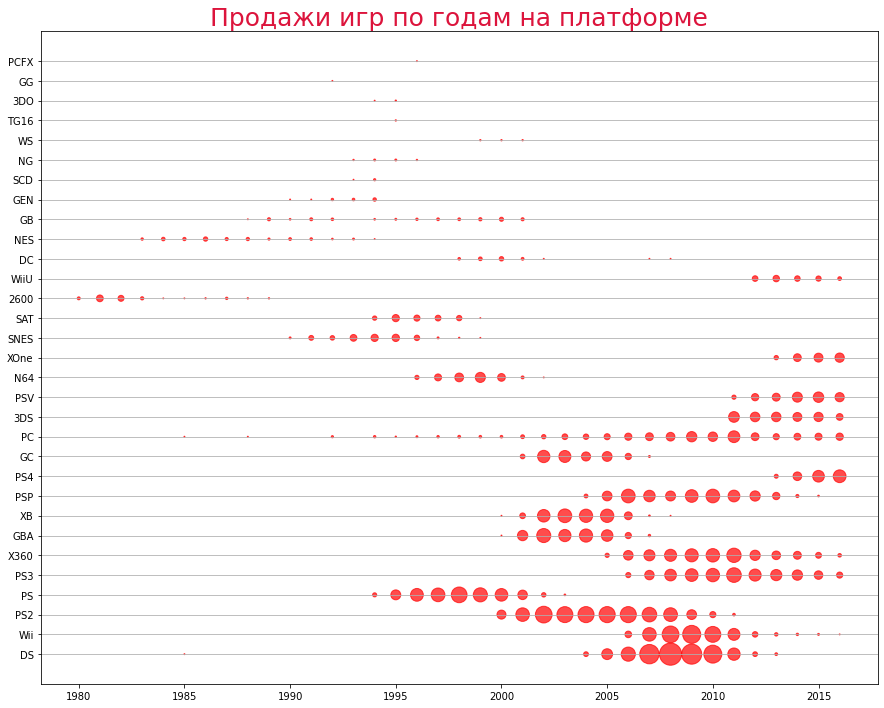

In [42]:
platform_by_years = (df
                     .groupby('platform')['year_of_release']
                     .value_counts()
                     .sort_values(ascending=False)
                     .to_frame(name='count')
                     .reset_index())

plt.figure(figsize=(15, 12))

plt.scatter(
    platform_by_years['year_of_release'],
    platform_by_years['platform'], 
    s=platform_by_years['count'],
    color='red',
    alpha=0.7)

plt.grid(axis='y')
plt.title('Продажи игр по годам на платформе', fontdict = {'size':25, 'color':'crimson'});

plt.show()

<HR>

- За какой характерный срок появляются новые и исчезают старые платформы?

Как я предполагал ранее в выборке нерелевантные данные, отсутствует большое к-во игр, поэтому по датам продажи игр нельзя вычислить время поддержки игровых устройств, стоит это проверить.

| Это можно проверить собрав данные из вики (объектов немного так что можно сделать вручную).

<span style="color: red"><b>!!!</b></span> PC мы уберем и добавим в конце т.к. эта не игровая консоль, так что она не выйдет из оборота (заменяются отдельные компоненты, а не все устройство.

In [43]:
# Данные из датасета
(
    df.query('platform!="PC"').groupby("platform")["year_of_release"].max()
    - df.query('platform!="PC"').groupby("platform")["year_of_release"].min()
).mean()

6.833333333333333

In [44]:
# Данные собранные вручную (Максимальную дату поставим 2016)
years_list = {
    "3DO": [1993 - 1996],
    "3DS": [2011 - 2016],
    "DC": [1998 - 2001],
    "DS": [2004 - 2005],
    "GB": [1989 - 2003],
    "GBA": [2001 - 2010],
    "GC": [2001 - 2007],
    "N64": [1996 - 2002],
    "NG": [1990 - 1997],
    "PCFX": [1994 - 1998],
    "PS": [1994 - 2006],
    "PS2": [2000 - 2013],
    "PS3": [2006 - 2016],
    "PS4": [2013 - 2016],
    "PSP": [2004 - 2014],
    "XOne": [2013 - 2016],
    "PSV": [2011 - 2016],
    "SAT": [1994 - 2000],
    "SNES": [1990 - 2003],
    "TG16": [1987 - 1994],
    "WS": [1999 - 2003],
    "Wii": [2006 - 2016],
    "WiiU": [2012 - 2017],
    "X360": [2006 - 2016],
    "XB": [2001 - 2009],
}

sum_year = [np.mean(i) for i in zip(*years_list.values())]
np.abs(sum_year)[0]

7.08

Похоже данные весьма близки с истине и мои предположения были неверными.

**Вывод:**

1. Топ 5 самых продаваемых консолей это PS2, X360, PS3, Wii, PS.
2. В среднем игровые устройства живут 5 лет (PC - бессмертен, ведь ему обновляют компоненты, несмотря на парадокс Корабля Тесея,  игры запускаются независимо от года производства (есть эмуляторы и спец. онлайн магазины старых игр).

<hr>

<h3><span style="color: red"><b>- </b></span>Возьмите данные за соответствующий актуальный период. </h3>

* Актуальный период определите самостоятельно в результате исследования предыдущих вопросов.  
* Основной фактор — эти данные помогут построить прогноз на 2017 год.   
* Не учитывайте в работе данные за предыдущие годы.

**Сложно дать определение актуального периода, ведь есть несколько целей (все относится к влиянию на прибыль игры - наша конечная цель), которые мы преследуем:**

1. Нужно выбрать период с большим числом игр для анализа жанра (какие жанры становятся более, а какие менее прибыльными), и оценок (критиков и пользователей).
2. Желательно, чтобы консоль существовала меньше 5 лет (до приблизительного срока закрытия в среднем 7 лет).
3. Нужно чтобы консоль еще не вышла из тиража иначе оценивать её прибыльность бессмысленно.
    
**Чтобы выполнить все наши цели, сделаем следующее:**
 
1. Добавить столбец **relevance**, если условия "консоль существует меньше 5 лет" и  "консоль поддерживается в 2016"  выполняются поставим True.
2. Возьмем игры от 2000

In [45]:
# Возьмем игры от 2000

df = df.query('year_of_release >= 2000').reset_index(drop=True)

In [46]:
# Добавить столбец relevance, если условия "консоль существует меньше 5 лет" и
# "консоль поддерживается в 2016" выполняются поставим True.


def revel(x):
    if x["platform"] in platform_suitable:
        return True
    else:
        return False


platform_suitable = (
    (
        (
            (
                df.groupby("platform")["year_of_release"].max()
                - df.groupby("platform")["year_of_release"].min()
            )
            <= 4
        )
        & (df.groupby("platform")["year_of_release"].max() == 2016)
    )
    .reset_index()
    .query("year_of_release == True")["platform"]
    .to_list()
)
# Так как PC это не игровая консоль, то стоит его отдельно добавить.
platform_suitable.append("PC")


df["relevance"] = df.apply(revel, axis=1)


Вот мы и получили передовые портативные и стационарные консоли последнего поколения.

<hr>

<h3><span style="color: red"><b>- </b></span> Какие платформы лидируют по продажам, растут или падают?
</h3>   

* Выберите несколько потенциально прибыльных платформ.

Возьмем только игры выпущенные после 2010, ведь нам нужны актуальные консоли

In [47]:
df.query("year_of_release > 2010").pivot_table(
    index="year_of_release", columns="platform", values="total_sales", aggfunc="sum"
)

platform,3DS,DS,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,,
2011,63.20,26.18,35.03,0.45,156.78,NaN,17.82,4.63,59.65,NaN,143.84,NaN
2012,51.36,11.01,23.22,NaN,107.35,NaN,7.69,16.19,21.71,17.56,99.74,NaN
2013,56.57,1.54,12.38,NaN,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,NaN,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,NaN,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,NaN,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


In [48]:
df.query("year_of_release > 2010").query("relevance == True").pivot_table(
    index="year_of_release", columns="platform", values="total_sales", aggfunc="sum"
)

platform,PC,PS4,WiiU,XOne
year_of_release,,,,
2011,35.03,NaN,NaN,NaN
2012,23.22,NaN,17.56,NaN
2013,12.38,25.99,21.65,18.96
2014,13.28,100.00,22.03,54.07
2015,8.52,118.90,16.35,60.14
2016,5.25,69.25,4.60,26.15


Как мы видим наша сортировка, работает верно, хотя можно было просто взять максимальную дату 2016 (Хочется плакать, но все равно приходилось отвечать на вопросы).

Во-первых, нужно оставить только актуальные платформы, во вторых нужно взять медиану, чтобы избежать выбросов (сверх популярные серии игр, эксклюзивы которые консоли усиленно продвигают...) (не берем сумму так, как нам нужна прибыль от изданной игры, а не общая прибыльность платформы, которая зависит не только от стоимости игр, но и от их количества).

In [49]:
df.query('relevance == True')\
  .groupby('platform')['total_sales']\
  .median()\
  .sort_values(ascending = False)

platform
WiiU    0.22
XOne    0.22
PS4     0.20
PC      0.04
Name: total_sales, dtype: float64

**Вывод:**  
Из актуальных платформ лучшими являются  XOne, WiiU, PS4, PC

Так как теперь у нас только 4 подходящие платформы, то стоит обновить  колонку relevance.

In [50]:
suitable_platforms = (
    df.query("relevance == True")
    .groupby("platform")["total_sales"]
    .median()
    .sort_values(ascending=False)
    .index.tolist()
)


In [51]:
def suitable(x):
    if x['platform'] in suitable_platforms:
        return True 
    else:
        return False
                                                            
df['relevance'] = df.apply(suitable, axis=1)

<hr>

<h3><span style="color: red"><b>- </b></span> Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам.</h3> 

* Опишите результат

|**Нерелевантные платформы.**

<AxesSubplot:>

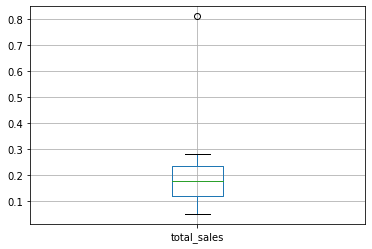

In [52]:
df.query("relevance == False").pivot_table(
    index="platform", values="total_sales", aggfunc="median"
).boxplot()


Данные по всем платформам имеют один сильный выброс, остальные значения находятся в пределах от 0.05 до 0.35 млн проданных копий, кроме этого медиана находится у 0.17 млн, то есть в среднем игры имеют 0.17 проданных копий.

|**Релевантные платформы (их всего 4 и в boxplot не особо много смысла).**

<AxesSubplot:>

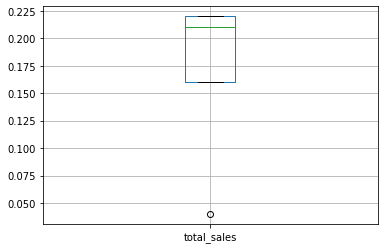

In [53]:
df.query("relevance == True").pivot_table(
    index="platform", values="total_sales", aggfunc="median"
).boxplot()

In [54]:
df.head(5)

,game_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,age_rating,relevance
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76.0,80.0,E,False
1,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82.0,83.0,E,False
2,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80.0,80.0,E,False
3,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,29.80,89.0,85.0,E,False
4,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,28.91,58.0,66.0,E,False


**Вывод:**  
Как не странно отличий нерелевантными платформами и нерелевантными отличий почти.  
В среднем (медиана) у игр 200 тыс. продаж.

(0.0, 1.0)

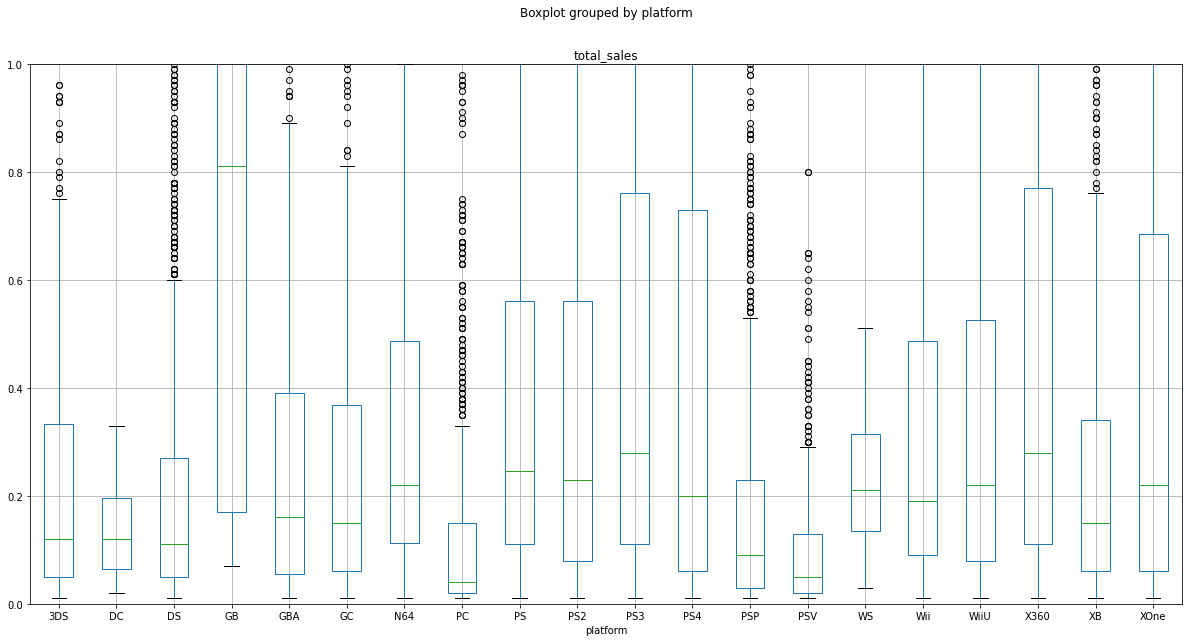

In [55]:
df.boxplot(column=["total_sales"], by="platform", figsize=(20, 10))
plt.ylim(0, 1)

Кроме все медианные значения имеют сильный разброс (где то от 0.06 - 0.35 млн).  
А **GB** вообще более 0.8 млн, но это из-за того, что там всего несколько игр и они очень популярны.

<hr>

<h3><span style="color: red"><b>- </b></span> Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. </h3> 

* Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. 
* Сформулируйте выводы.

In [56]:
def platfirm_corr(platform_):
    df_X = df.query("platform == @platform_")

    ax1 = df_X.plot(
        kind="scatter",
        x="total_sales",
        y="critic_score",
        alpha=0.3,
        figsize=(16, 5),
        color="red",
    )
    ax2 = df_X.plot(
        kind="scatter",
        x="total_sales",
        y="user_score",
        alpha=0.3,
        figsize=(16, 5),
        color="black",
        ax=ax1,
    )

    plt.legend(["critic_score", "user_score"])
    plt.title(
        "Зависимость количества проданных копий  от оценки критиков или пользователей "
        + platform_,
        fontdict={"size": 19, "color": "crimson"},
    )

    plt.xlim(0, 1)

    ax1 = df_X.plot(
        kind="scatter",
        x="total_sales",
        y="critic_score",
        alpha=0.3,
        figsize=(16, 5),
        color="red",
    )
    ax2 = df_X.plot(
        kind="scatter",
        x="total_sales",
        y="user_score",
        alpha=0.3,
        figsize=(16, 5),
        color="black",
        ax=ax1,
    )
    plt.xlim(1)
    plt.show()

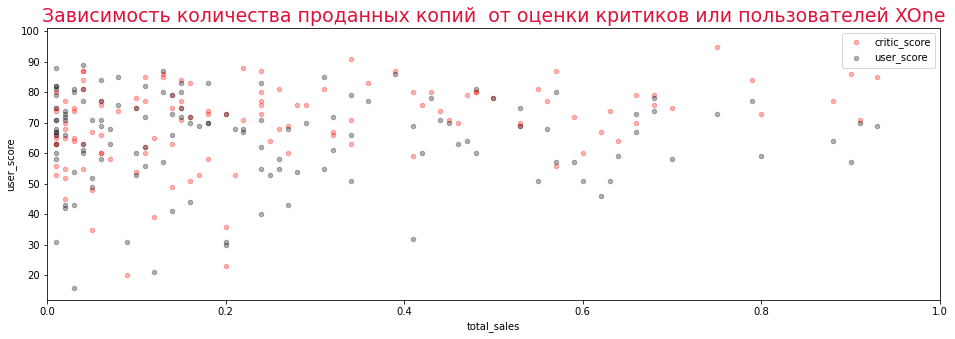

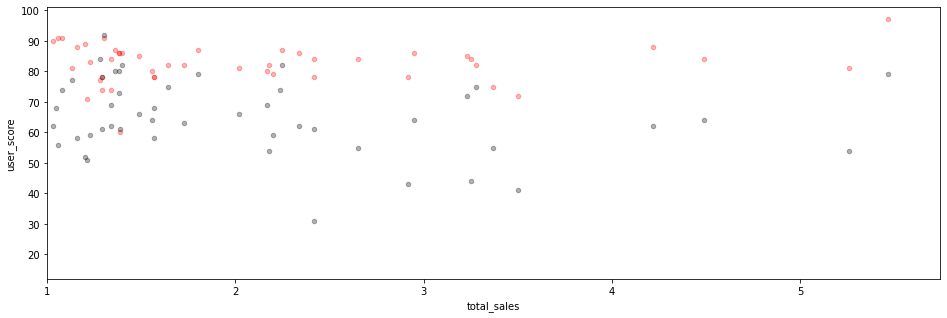

In [57]:
platfirm_corr('XOne')

**Вывод:**

**Оценки пользователей, как и критиков влияют на кол-во проданных копий:**

1. У игр с продажами более 700 тыс. **оценки критиков выше 70**.
2. **Оценки же пользователей имеют больший разброс** и не столь явно влияют на продажи.
3. Удивительно, но оценки критиков чаще всего выше, чем оценки пользователей. 
4. По моим наблюдениям оценки были взяты с метакритики, а там есть проблемы с оценками пользователей и критиков:
    * Если игра не самая популярная и её оценило несколько человек, то её легче получить высокий бал (out of the park baseball 2007 имеет такую же оценку, как GTAV или Half Life 2).
    * Пользователи часто занижают оценки из-за эксклюзивности или каких либо внешних особенностей (Call of Duty 4: Modern Warfare - из-за злых русских получила очень низкие оценки от пользователей и высокие от критиков.) 

In [58]:
corr = df[['critic_score', 'user_score']].corr()
corr.style.format("{:.2%}")

,critic_score,user_score
critic_score,100.00%,57.65%
user_score,57.65%,100.00%


<b><span style="color: red"><b>- </b></span> Соотнесите выводы с продажами игр на других платформах.</b> 

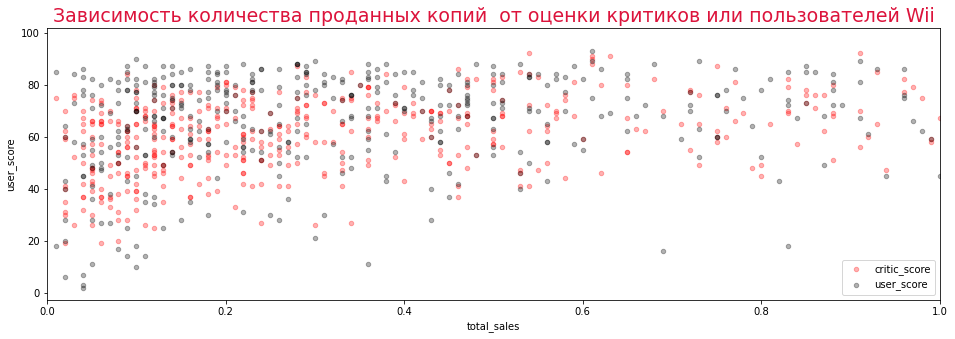

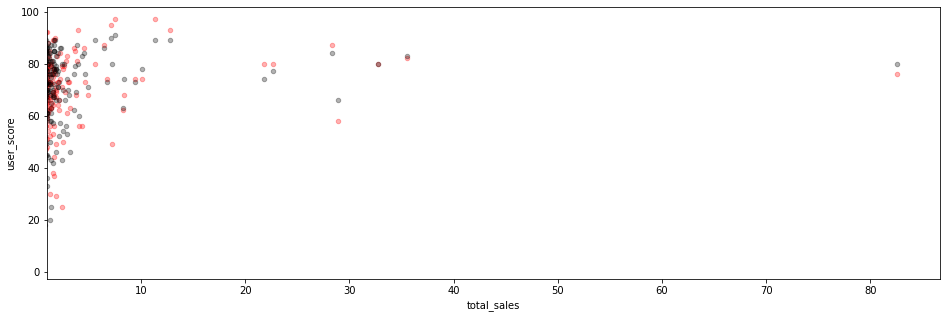

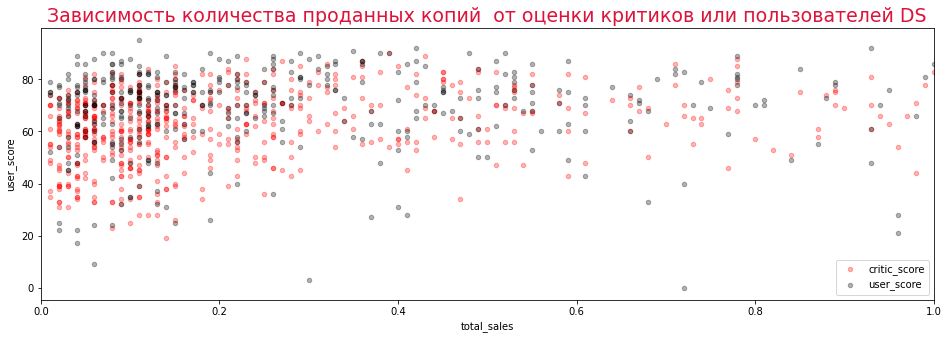

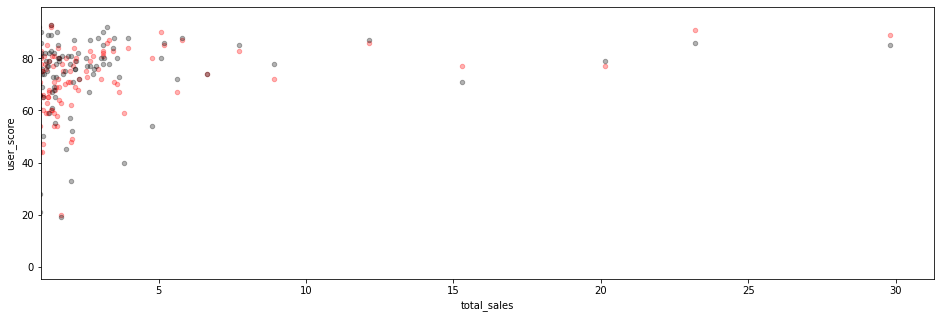

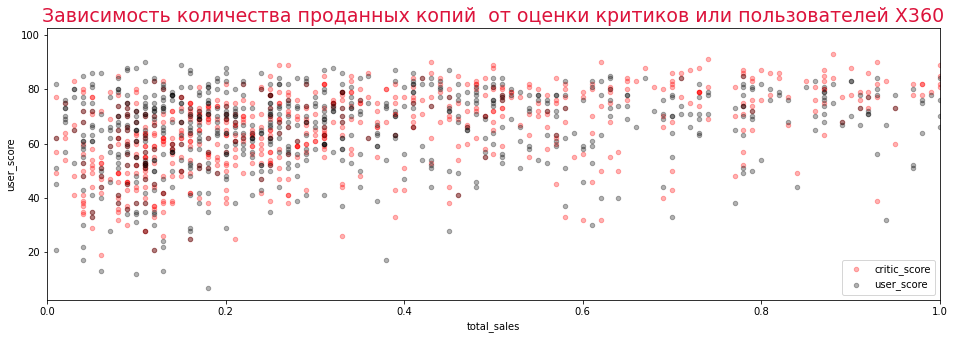

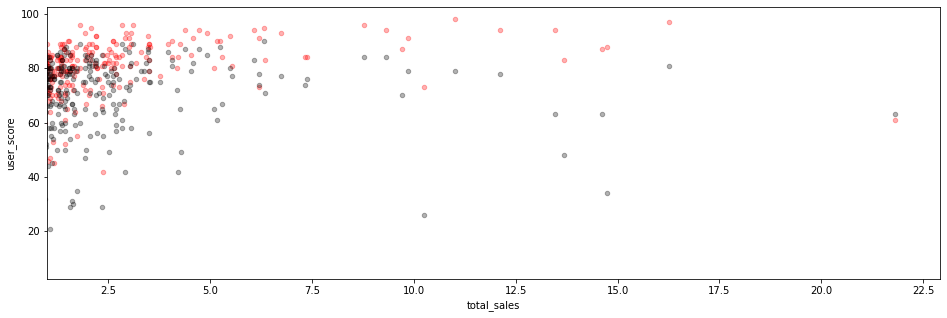

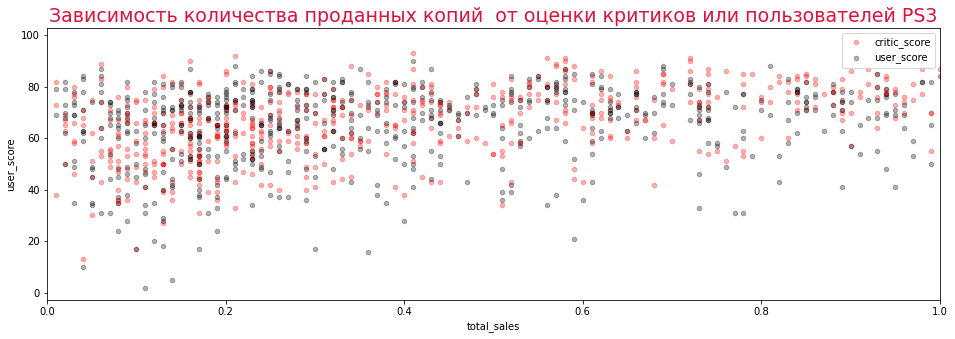

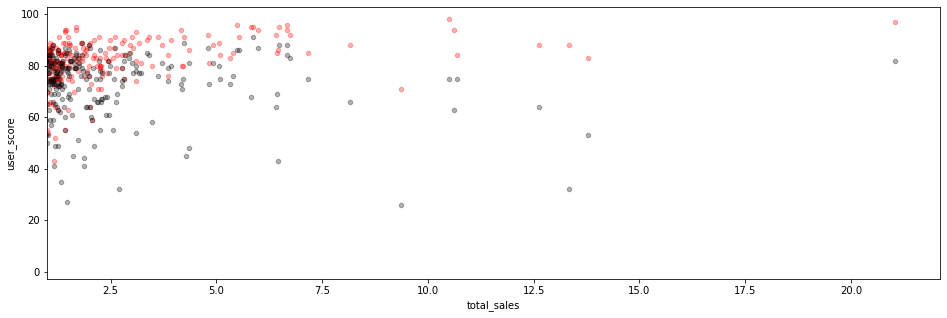

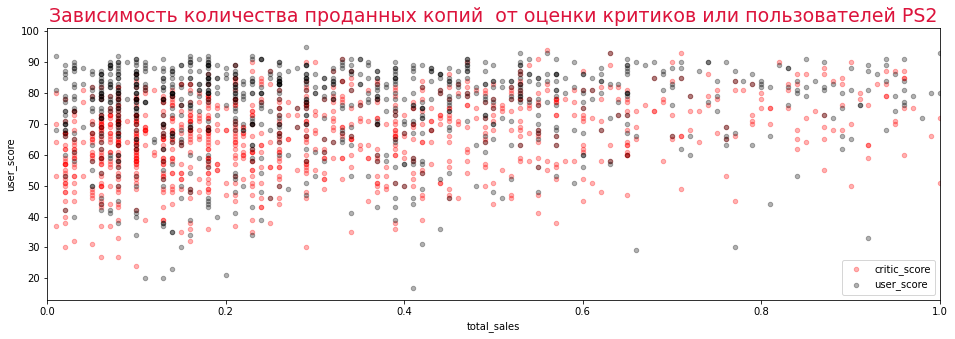

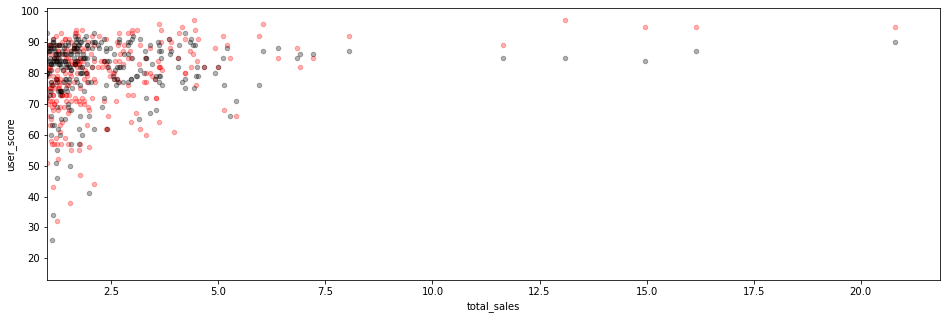

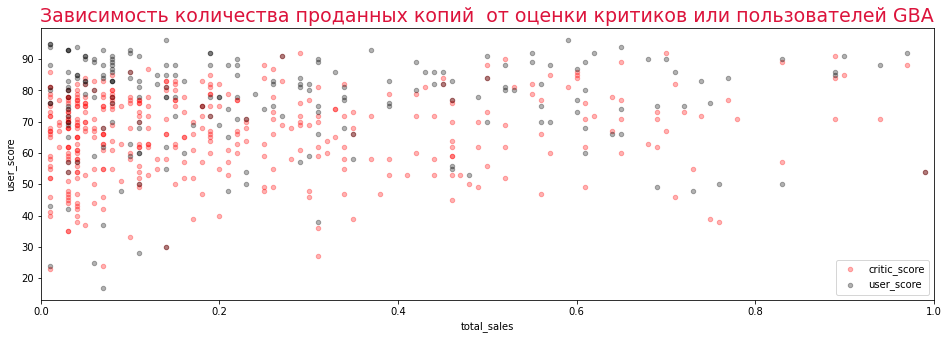

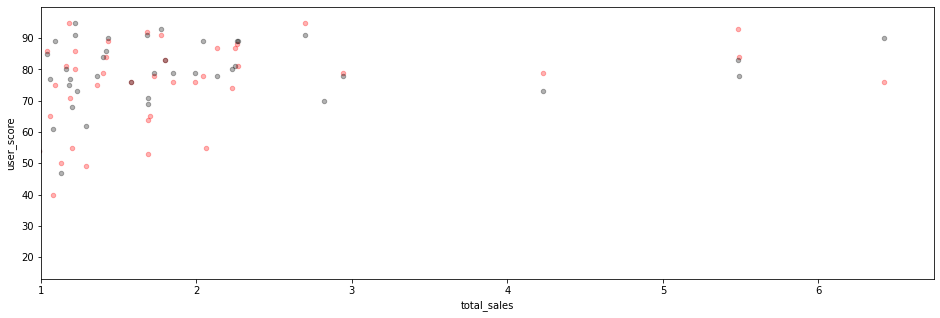

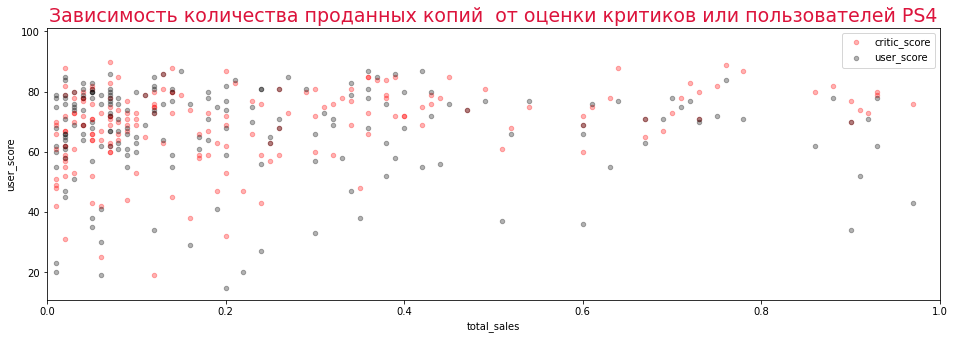

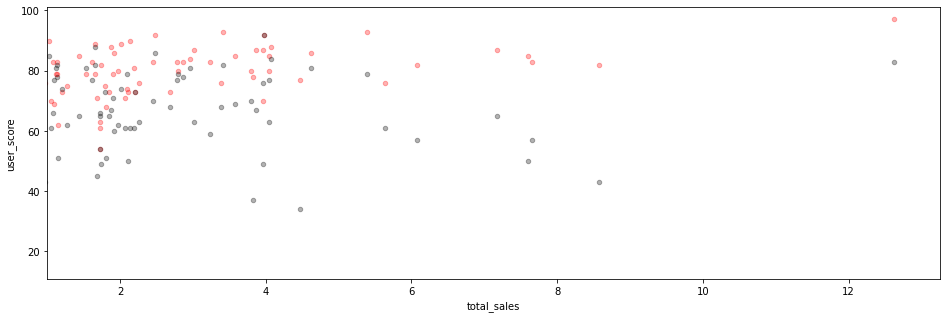

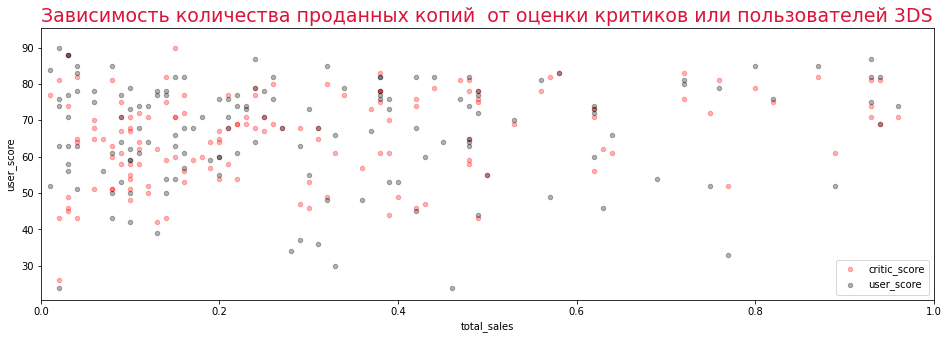

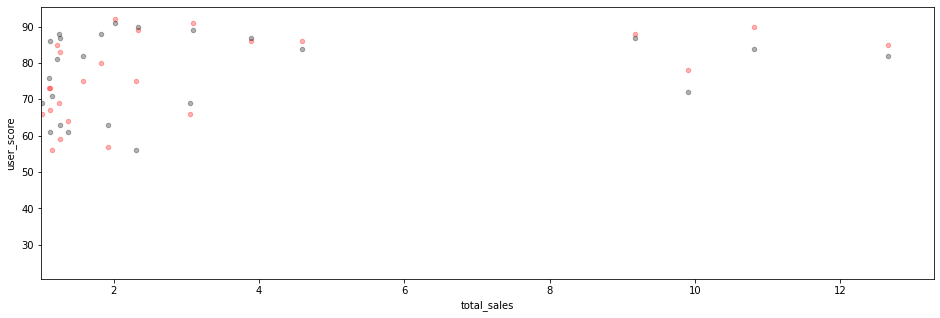

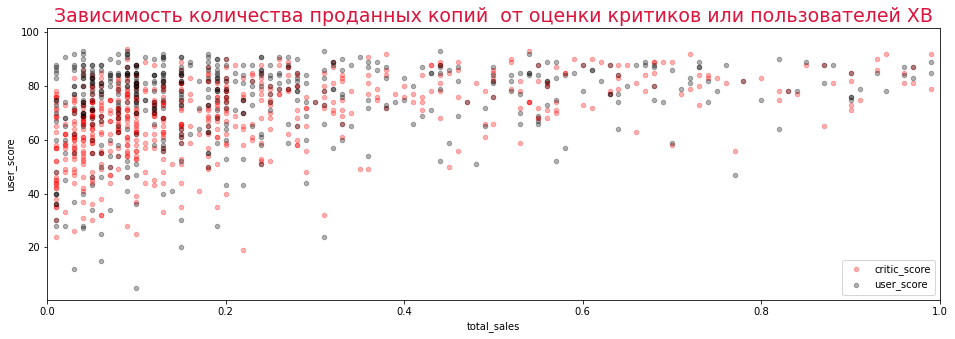

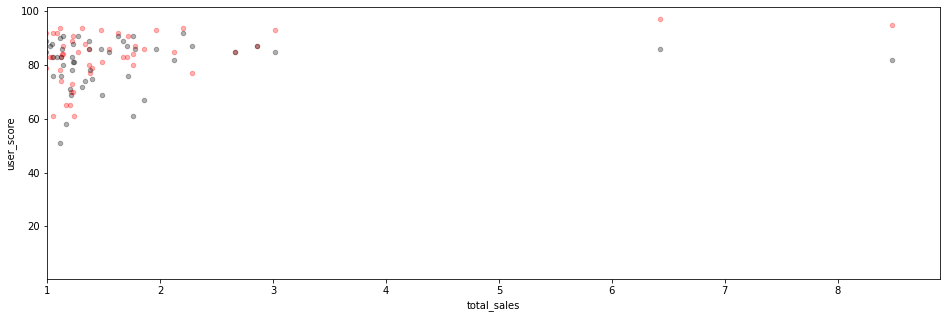

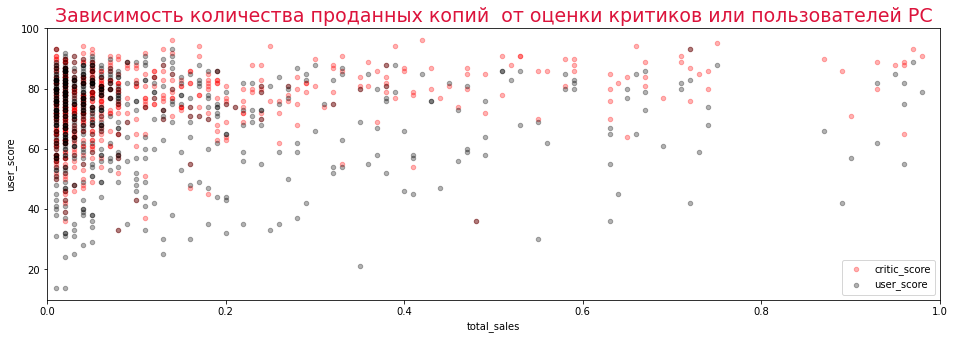

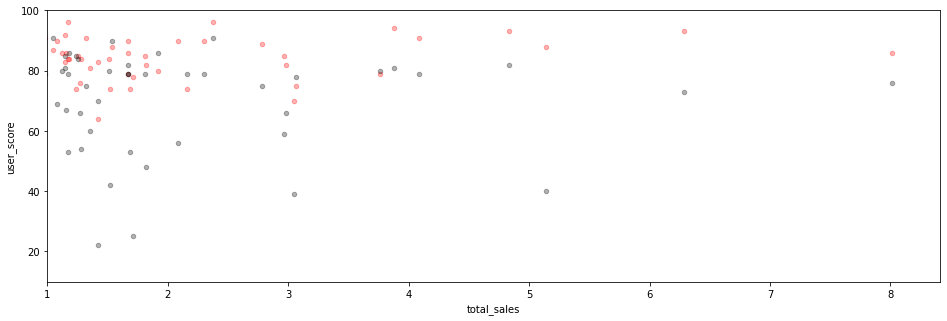

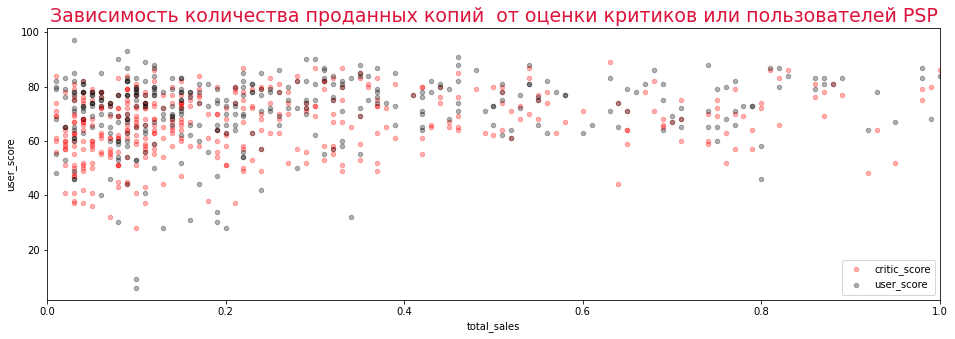

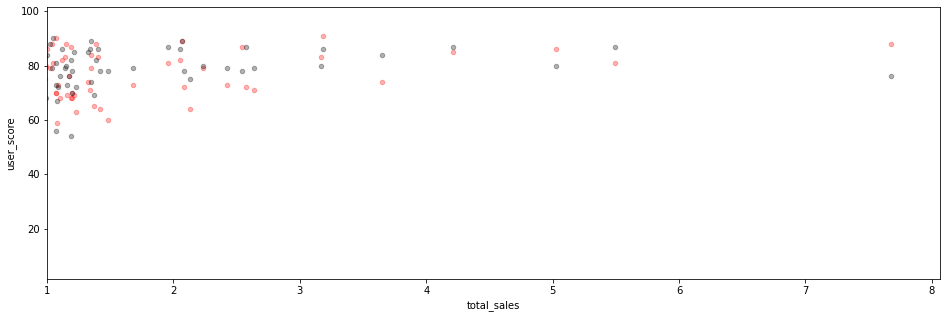

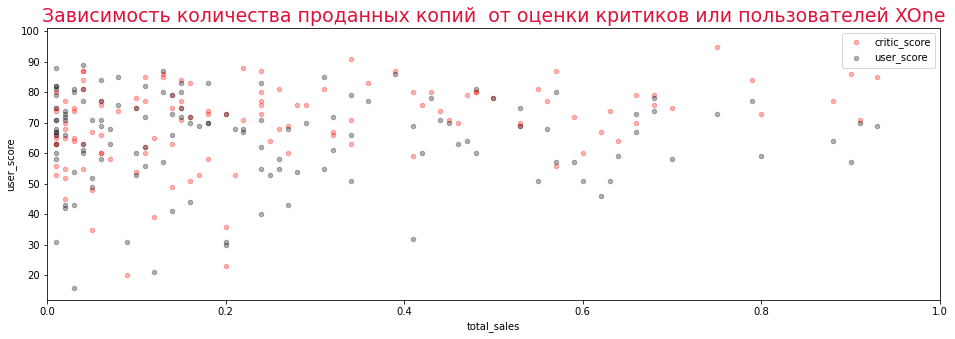

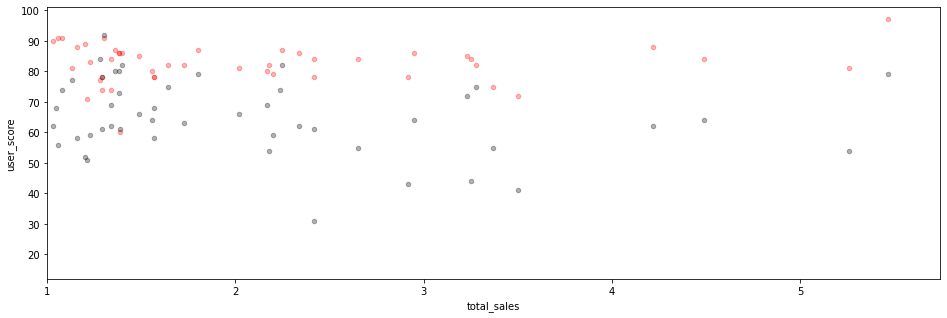

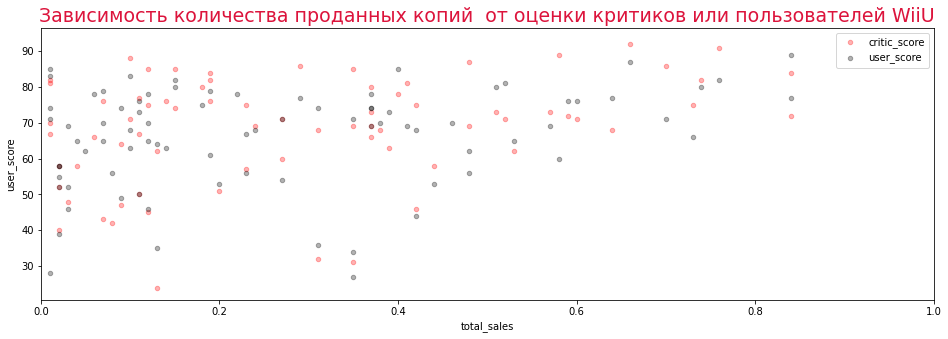

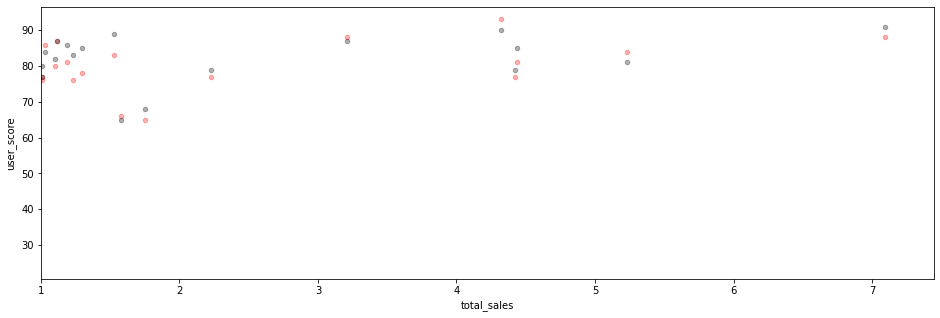

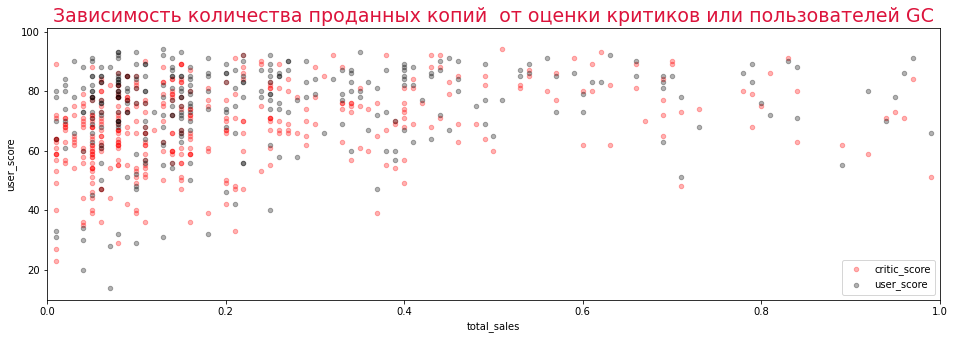

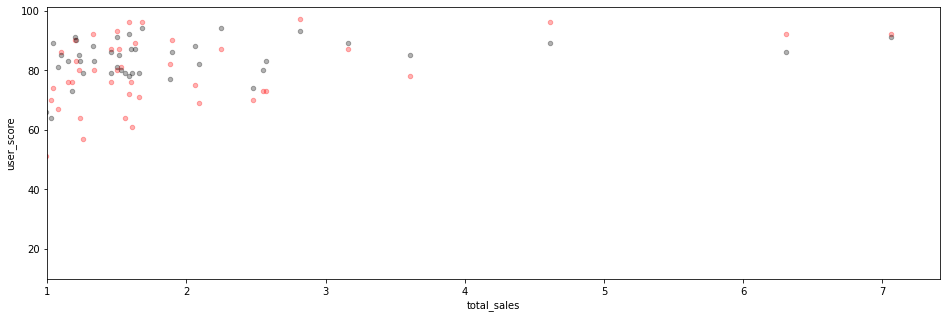

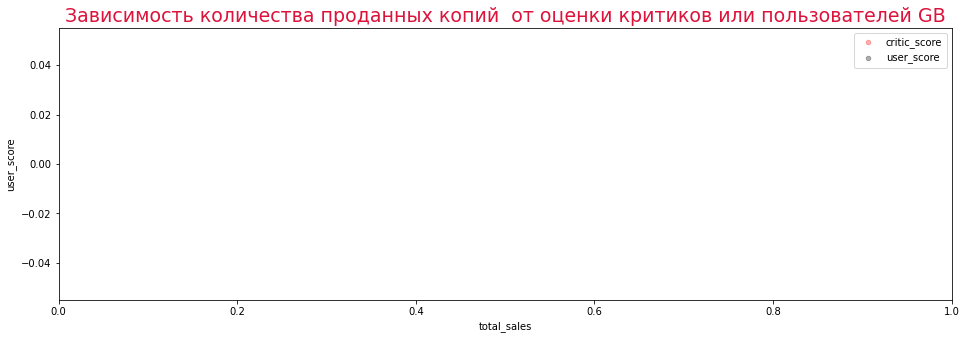

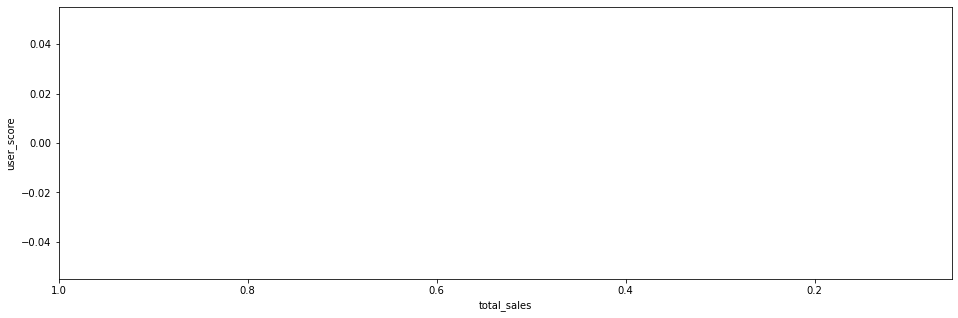

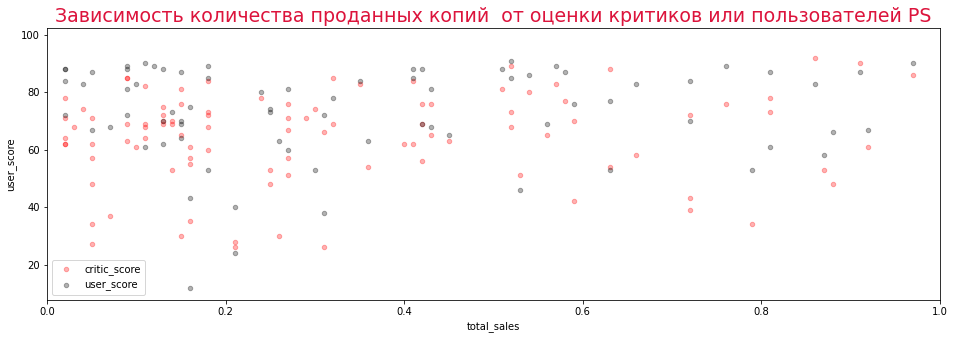

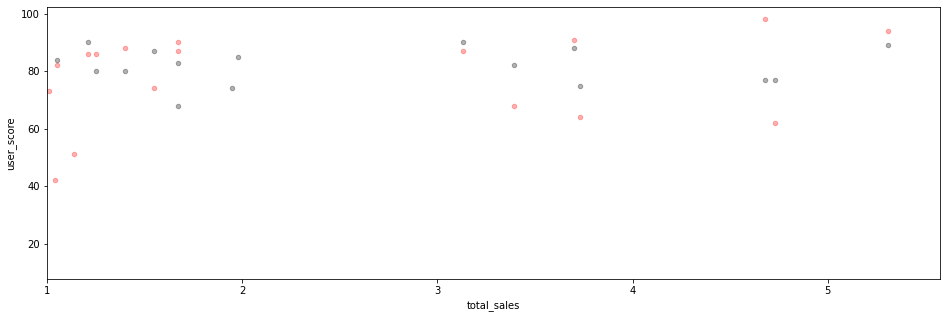

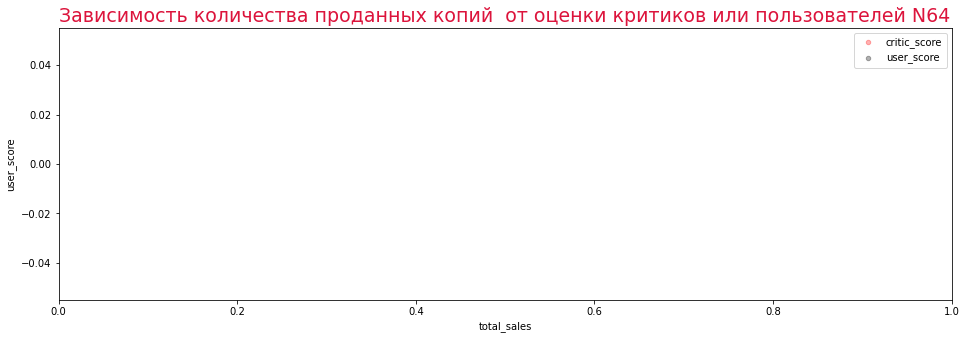

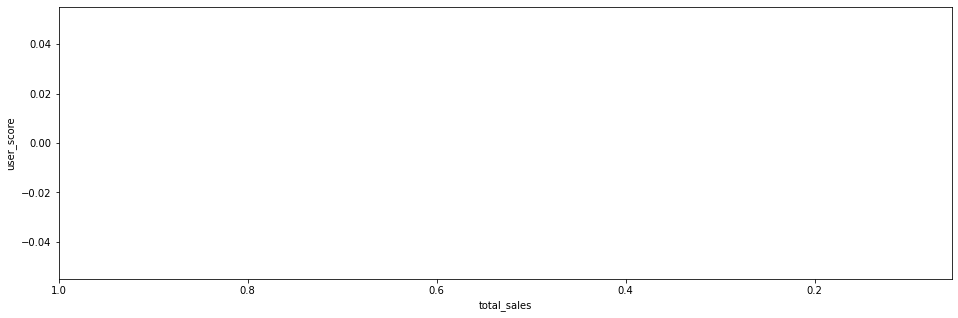

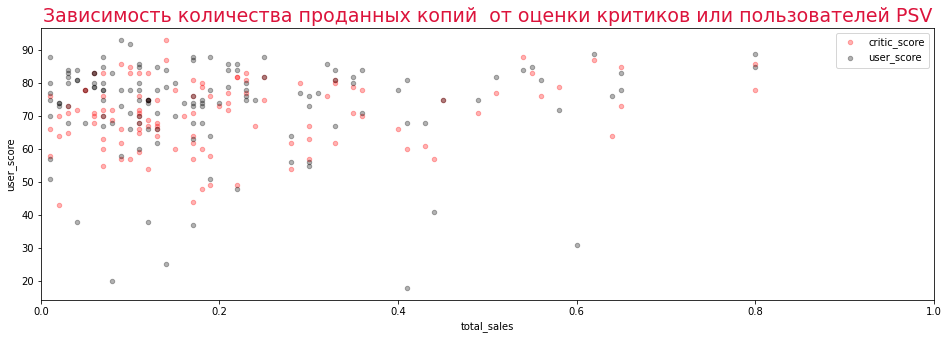

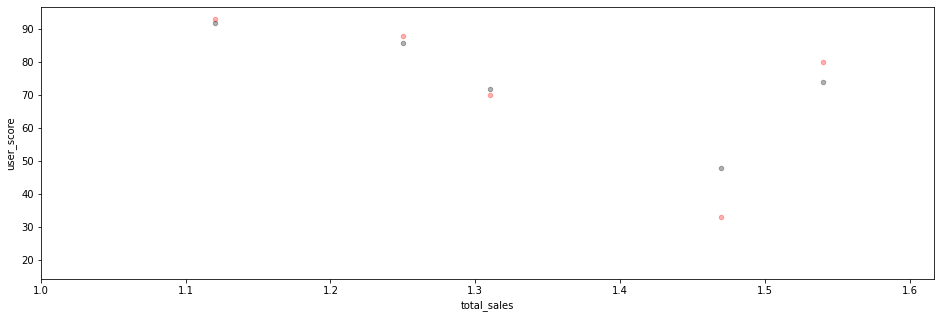

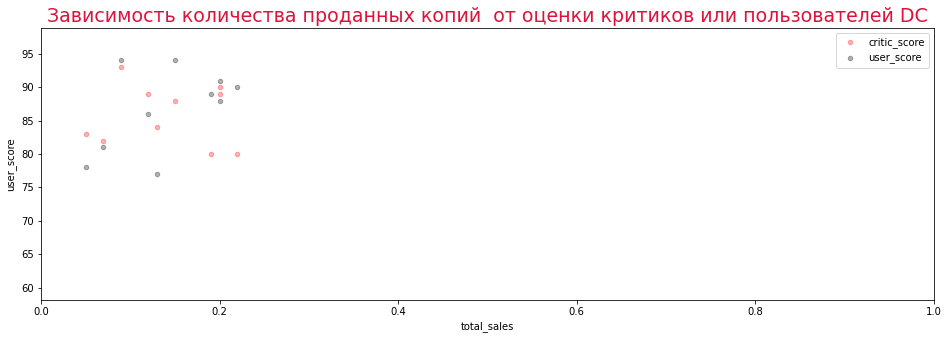

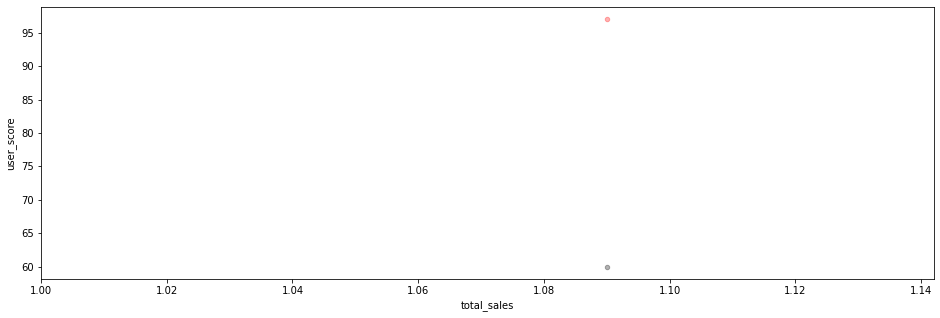

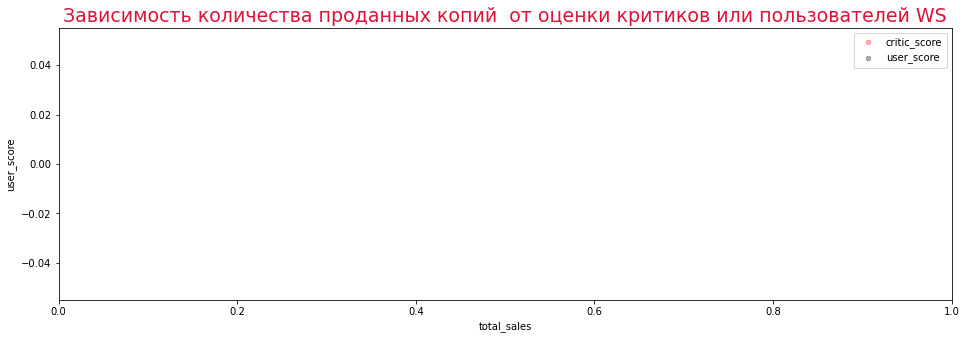

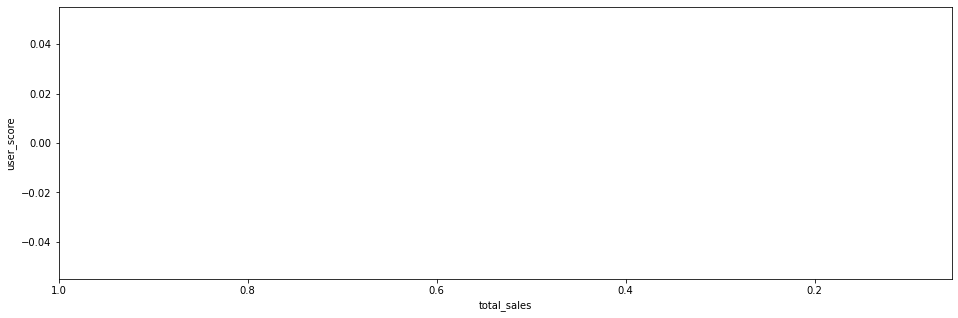

In [59]:
for i in df['platform'].unique():
    platfirm_corr(i)

Оценки критиков значительно лучше соотносятся с общим количеством продаж.  
В свою очередь оценки пользователей часто скачут ,использовать их для предсказания продаж не лучшая идея.

<hr>

<h3><span style="color: red"><b>- </b></span> Посмотрите на общее распределение игр по жанрам. </h3> 

*  Что можно сказать о самых прибыльных жанрах?
*  Выделяются ли жанры с высокими и низкими продажами?

In [60]:
df.head(5)

,game_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,age_rating,relevance
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76.0,80.0,E,False
1,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82.0,83.0,E,False
2,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80.0,80.0,E,False
3,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,29.80,89.0,85.0,E,False
4,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,28.91,58.0,66.0,E,False


Вот ради чего я оставлял игры до 2010, чтобы посмотреть как изменяется прибыль от жанров.

In [61]:
df.query("year_of_release >= 2010").pivot_table(
    index="genre", values="total_sales", aggfunc=["median", "mean", "sum"]
) - df.query("year_of_release <  2010").pivot_table(
    index="genre", values="total_sales", aggfunc=["median", "mean", "sum"]
)


,median,mean,sum
,total_sales,total_sales,total_sales
genre,,,
Action,-7.000000e-02,-0.088327,-179.98
Adventure,-5.000000e-02,-0.086169,-61.74
Fighting,-2.000000e-02,-0.112245,-148.72
Misc,-3.000000e-02,-0.066617,-249.23
Platform,-2.775558e-17,0.121637,-254.98
Puzzle,-3.000000e-02,-0.141490,-97.00
Racing,-1.000000e-02,-0.032401,-315.70
Role-Playing,-3.000000e-02,-0.013154,-100.66


Бесспорный лидер это шутеры.

| 2014-2015

In [62]:
df.query("year_of_release == 2015").pivot_table(
    index="genre", values="total_sales", aggfunc=["median", "mean", "sum"]
) - df.query("year_of_release == 2014").pivot_table(
    index="genre", values="total_sales", aggfunc=["median", "mean", "sum"]
)

,median,mean,sum
,total_sales,total_sales,total_sales
genre,,,
Action,-0.135,-0.232517,-25.21
Adventure,-0.010,0.076844,2.59
Fighting,-0.030,-0.312940,-7.95
Misc,0.030,-0.260000,-11.81
Platform,-0.730,-0.415615,-2.76
Puzzle,-0.005,-0.094524,-0.78
Racing,-0.020,-0.168704,-8.59
Role-Playing,-0.005,-0.030020,-7.98


И вновь лидируют шутеры.

**Вывод:**  
Из всех жанров лидер это шутеры, после идут рпг, симуляторы и стратегии.

## <span style="color: crimson">Этап 5</span>  Составить портрет пользователя каждого региона

* Определите для пользователя каждого региона (NA, EU, JP):
    - Самые популярные платформы (топ-5). Опишите различия в долях продаж.
    - Самые популярные жанры (топ-5). Поясните разницу.
    - Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [63]:
# Функция для определения выгодного жанра платформы и возрастного рейтинга.
def soul(country):
    display(
        df.query("year_of_release >= 2010").pivot_table(
            index="year_of_release", columns="platform", values=country, aggfunc="sum"
        )
    )
    display(
        df.pivot_table(
            index="year_of_release", columns="genre", values=country, aggfunc="sum"
        ).tail()
    )
    display(
        df.query("year_of_release >= 2010").pivot_table(
            index="year_of_release",
            columns=["age_rating"],
            values=country,
            aggfunc="sum",
        )
    )


<h3><span style="color: red"><b>- </b></span> Продажи в Северной Америке.</h3>

In [64]:
soul('na_sales')

platform,3DS,DS,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,,
2010,NaN,40.80,9.19,2.19,60.99,NaN,7.46,NaN,72.64,NaN,107.38,NaN
2011,27.34,14.27,10.76,0.13,64.88,NaN,2.06,1.49,31.11,NaN,86.75,NaN
2012,17.11,4.02,8.01,NaN,39.88,NaN,0.13,5.94,10.89,8.89,58.39,NaN
2013,15.56,0.57,3.88,NaN,41.45,10.13,0.00,2.52,4.48,9.85,53.36,11.85
2014,12.33,NaN,3.51,NaN,16.39,34.75,0.00,1.98,1.59,10.50,20.25,30.97
2015,6.17,NaN,2.36,NaN,4.99,42.37,0.00,0.39,0.43,6.76,7.36,36.03
2016,4.14,NaN,1.36,NaN,0.67,21.49,NaN,0.15,0.06,2.10,0.69,14.27


genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
year_of_release,,,,,,,,,,,,
2012,51.79,1.78,4.24,10.70,7.24,0.30,4.26,17.60,35.03,3.11,16.26,0.95
2013,53.52,1.50,3.12,12.44,11.35,0.18,4.22,12.93,30.72,2.23,19.14,2.30
2014,38.85,1.80,6.89,9.47,3.01,0.59,5.92,13.65,30.84,1.27,19.82,0.16
2015,24.39,2.89,3.70,4.82,2.49,0.06,2.09,13.93,31.94,1.20,18.77,0.58
2016,9.29,0.95,1.84,0.76,1.29,0.00,0.73,5.89,16.24,0.16,7.54,0.24


age_rating,E,E10+,EC,M,RP,T
year_of_release,,,,,,
2010,100.98,41.66,32.74,73.77,NaN,51.50
2011,55.80,42.02,20.80,76.88,0.0,43.29
2012,35.32,21.46,13.89,66.36,NaN,16.23
2013,28.31,21.01,24.70,68.79,NaN,10.84
2014,24.15,15.36,27.28,49.39,NaN,16.09
2015,18.62,14.06,28.91,31.36,NaN,13.91
2016,7.97,3.81,8.53,15.67,NaN,8.95


**Самые популярные платформы**: PS4, XOne, 3DS, WiiU

**Самые популярные жанры**: Shooter, Action, Sports, Role-Playing

**Самый прибыльный рейтинг**: M, T

<hr>

<h3><span style="color: red"><b>- </b></span> Продажи в Японии.</h3>

In [65]:
soul('jp_sales')

platform,3DS,DS,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,,
2010,NaN,19.86,0.0,0.71,9.87,NaN,18.16,NaN,8.78,NaN,2.11,NaN
2011,12.83,4.32,0.0,0.09,14.10,NaN,13.57,0.80,5.58,NaN,1.78,NaN
2012,19.98,3.72,0.0,NaN,11.94,NaN,7.18,2.45,3.34,2.13,1.06,NaN
2013,23.57,0.00,0.0,NaN,12.13,0.94,2.93,4.05,0.05,3.57,0.43,0.02
2014,20.69,NaN,0.0,NaN,6.25,2.97,0.24,6.13,0.00,3.19,0.08,0.14
2015,15.52,NaN,0.0,NaN,3.67,6.31,0.12,4.85,0.00,3.45,0.00,0.17
2016,8.03,NaN,0.0,NaN,1.30,5.74,NaN,3.56,0.00,0.67,0.00,0.01


genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
year_of_release,,,,,,,,,,,,
2012,12.31,2.42,1.79,3.66,3.84,0.96,0.20,14.40,2.62,5.89,2.60,1.11
2013,10.91,2.22,1.28,3.59,2.10,0.25,0.54,19.88,1.74,2.21,2.15,0.82
2014,6.53,1.38,4.83,2.42,1.27,0.41,1.47,17.75,1.08,0.38,1.61,0.56
2015,15.98,1.04,0.79,2.15,1.31,0.52,0.28,6.80,2.73,1.60,0.73,0.16
2016,7.07,1.18,0.75,1.04,0.11,0.00,0.01,6.61,1.06,0.33,0.92,0.23


age_rating,E,E10+,EC,M,RP,T
year_of_release,,,,,,
2010,11.19,1.99,33.28,4.31,NaN,8.72
2011,8.35,3.04,29.37,4.94,0.0,7.37
2012,13.19,2.30,23.79,7.09,NaN,5.43
2013,6.20,1.43,28.15,6.10,NaN,5.81
2014,3.69,1.19,24.01,3.72,NaN,7.08
2015,4.18,2.82,18.57,3.09,NaN,5.43
2016,1.07,0.45,14.32,1.20,NaN,2.27


**Самые популярные платформы**: 3DS, PS4, PSV

**Самые популярные жанры**: Action, Role-Playing

**Самый прибыльный рейтинг**: EC и T

<hr>

<h3><span style="color: red"><b>- </b></span> Продажи в Европе.</h3>

In [66]:
soul('eu_sales')

platform,3DS,DS,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,,
2010,NaN,18.82,12.12,1.54,50.50,NaN,5.82,NaN,36.31,NaN,46.31,NaN
2011,18.63,5.71,18.94,0.13,56.24,NaN,1.35,1.71,17.68,NaN,42.58,NaN
2012,11.68,2.68,12.40,NaN,39.04,NaN,0.25,5.26,5.99,5.28,32.00,NaN
2013,14.84,0.85,7.39,NaN,42.27,11.05,0.17,2.57,3.34,6.70,27.03,5.34
2014,8.73,NaN,8.87,NaN,18.24,46.50,0.00,2.45,1.86,6.66,11.28,18.15
2015,5.06,NaN,5.57,NaN,6.04,51.76,0.00,0.69,0.62,5.01,3.50,18.47
2016,2.33,NaN,3.53,NaN,1.26,31.78,NaN,0.39,0.11,1.48,0.71,9.63


genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
year_of_release,,,,,,,,,,,,
2012,41.21,1.21,2.24,6.28,5.83,0.40,7.10,11.56,25.61,3.63,8.56,0.95
2013,43.45,1.76,1.86,7.18,8.78,0.48,6.06,8.80,22.34,3.62,14.79,2.43
2014,39.86,1.82,2.97,8.60,3.60,0.39,7.61,10.96,25.24,3.56,17.91,0.22
2015,24.14,3.35,2.38,3.60,1.81,0.12,4.75,12.93,24.38,2.47,15.81,0.98
2016,10.68,1.32,1.34,0.66,1.39,0.01,1.77,4.28,15.90,1.27,12.01,0.59


age_rating,E,E10+,EC,M,RP,T
year_of_release,,,,,,
2010,55.61,21.28,22.83,41.78,NaN,29.92
2011,28.70,22.63,25.11,56.30,0.03,30.20
2012,29.66,12.68,12.59,48.64,NaN,11.01
2013,25.30,16.53,19.96,51.88,NaN,7.88
2014,23.23,14.62,23.24,47.90,NaN,13.75
2015,21.22,7.73,28.24,29.00,NaN,10.53
2016,13.61,3.81,7.47,16.54,NaN,9.79


**Самые популярные платформы**: PS4, XOne, PC, 3DS

**Самые популярные жанры**: Shooter, Sports, Action

**Самый прибыльный рейтинг**: M и EC

___

## <span style="color: crimson">Этап 6</span>  Составить портрет пользователя каждого региона

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action и Sports  разные.

**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые:**  
    1. **H0**: Средний пользовательские рейтинг платформ Xbox One и PC одинаковые.  
    2. **H1**: Средний пользовательские рейтинг платформ Xbox One и PC разный.

Будем использовать t-критерий Стьюдента, так как сравниваемые выборки независимы между собой.

In [67]:
alpha = 0.05

In [68]:
XOne = df[(df['platform'] == 'XOne') & (df['user_score'] > 0)]['user_score']
PC   = df[(df['platform'] == 'PC')   & (df['user_score'] > 0)]['user_score']

In [69]:
results = st.ttest_ind(XOne, PC)

In [70]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.750185722417189e-05
Отвергаем нулевую гипотезу


<hr>

**Средние пользовательские рейтинги жанров Action и Sports  разные.**   
    1. **H0**: средний пользовательский рейтинг жанров Action и Sports одинаковый   
    2. **H1**: средний пользовательский рейтинг жанров Action и Sports различается

In [71]:
action = df[(df['genre'] == 'Action') & (df['user_score'] > 0)]['user_score']
sports = df[(df['genre'] == 'Sports') & (df['user_score'] > 0)]['user_score']

In [72]:
results = st.ttest_ind(action, sports)

In [73]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.0952446346492873
Не получилось отвергнуть нулевую гипотезу


___

## <span style="color: crimson">Этап 7</span>  Общий вывод

<h3>По имеющимся данным сильнее всего на продажи игры влиет (всё, что у нас есть в таблице):</h3>

 1. Год выпуска, т.к. игрострой находится в упадке
 2. Отзывы  критиков  (но по <a href=http://www.jeffcheng.org/kojak/>исследованию</a>, которое провели на 85 играх в 2014 оценка игры на Metacritic не влияет на её продажи.)
 3. Платформа(мы) на которой распростаняется игра (и разумеется их кол-во).
 4. Возрастной рейтинг.


<h3>Самые выгодные направления:</h3>


1. В Северной Америке:

    * **Самые популярные платформы**: PS4, XOne, 3DS, WiiU
    * **Самые популярные жанры**: Shooter, Action, Sports, Role-Playing
    * **Самый прибыльный рейтинг**: M и T


2. В Японии:

    * **Самые популярные платформы**: 3DS, PS4, PSV
    * **Самые популярные жанры**: Action, Role-Playing
    * **Самый прибыльный рейтинг**: M и T


3. В Европе:
    
    * **Самые популярные платформы**: PS4, XOne, PC, 3DS
    * **Самые популярные жанры**: Shooter, Sports, Action
    * **Самый прибыльный рейтинг**: M и EC

**Советы интернет-магазину «Стримчик»:**

1. Воспользоваться **площадками профессионального анализа игровой индустрии** ( к примеру NewZoo), хоть они и платные, но зато там используется  значительно больший объем данных, который избавляется от выбросов (Call of Duty: modern warfare имеющий оценку 2.5 из-за того, что там убивают русских или The Last Of Us 2 - рейтинг, которой был 2.5 еще до выхода игры.) и конечно их алгоритмы со значительно большей точностью предсказывают тренды и прибыль игры.
2. Собирать данные с **нескольких источников**, брать только актуальные устройства.
3. **Актуальность устройства** можно вычислить просто посмотрев, что она еще поддерживается, а после загуглить, когда её перестанут поддерживать, это самый точный способ.